In [50]:
import os
import glob
import pandas as pd

import seaborn as sns

In [51]:
files = os.path.join(os.getcwd(), "*.csv")
files = glob.glob(files)

In [60]:
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
df3 = pd.read_csv(files[2])

In [61]:
merged_df = pd.merge(df1, df2, on='img')
merged_df = pd.merge(merged_df, df3, on='img')
merged_df

,img,time,time_bomb1,time_bomb2
0,031940_3M53.JPG,0.008647,0.008616,0.313016
1,027529_01M62.JPG,0.008545,0.008543,0.031709
2,035285_2M53.JPG,0.008500,0.008505,0.043810
3,034280_00M56.JPG,0.008508,0.008496,0.048704
4,035735_04M58.JPG,0.008486,0.008488,0.034932
...,...,...,...,...
95,025119_1M60.JPG,0.008478,0.008489,0.019818
96,036342_00M53.JPG,0.008475,0.008481,0.067821
97,034347_2M58.JPG,0.008477,0.008489,0.043814
98,037156_1M52.JPG,0.008479,0.008492,0.067814


In [62]:
merged_df['overhead_increase_bomb1'] = abs(merged_df['time'] - merged_df['time_bomb1'])/merged_df['time'] * 100
merged_df['overhead_increase_bomb2'] = abs(merged_df['time'] - merged_df['time_bomb2'])/merged_df['time'] * 100

In [63]:
merged_df.to_csv('merged.csv')
merged_df

,img,time,time_bomb1,time_bomb2,overhead_increase_bomb1,overhead_increase_bomb2
0,031940_3M53.JPG,0.008647,0.008616,0.313016,0.358433,3519.848907
1,027529_01M62.JPG,0.008545,0.008543,0.031709,0.016741,271.085379
2,035285_2M53.JPG,0.008500,0.008505,0.043810,0.056096,415.390009
3,034280_00M56.JPG,0.008508,0.008496,0.048704,0.140119,472.469454
4,035735_04M58.JPG,0.008486,0.008488,0.034932,0.028097,311.660251
...,...,...,...,...,...,...
95,025119_1M60.JPG,0.008478,0.008489,0.019818,0.126543,133.747645
96,036342_00M53.JPG,0.008475,0.008481,0.067821,0.064701,700.222235
97,034347_2M58.JPG,0.008477,0.008489,0.043814,0.140631,416.875738
98,037156_1M52.JPG,0.008479,0.008492,0.067814,0.146215,699.780677


In [64]:
temp_df = merged_df[['time', 'time_bomb1', 'time_bomb2']].sum()
temp_df

time          0.848409
time_bomb1    0.848859
time_bomb2    5.870967
dtype: float64

<AxesSubplot: >

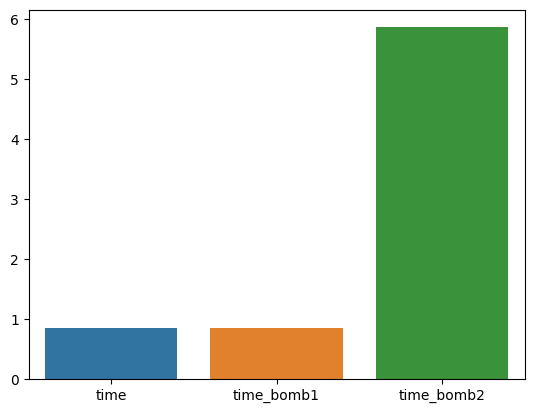

In [57]:
sns.barplot(x=temp_df.index, y=temp_df.values)